In [1]:
import desdeo_emo
import desdeo_problem

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from desdeo_problem.testproblems import TestProblems

In [4]:
from desdeo_problem.testproblems import DBMOPP, Region, utilities

In [5]:
plt.rcParams["figure.figsize"] = (10,8)

## Create DBMOPP generator 

In [6]:
# DBMOP object misses attribute hard_constraint_radius aswell wehen setting const space

# 0: No constraint, 1-4: Hard vertex, centre, moat, extended checker, 
# 5-8: soft vertex, centre, moat, extended checker.

# 1,2 works 3, 4 not sure



assigned centre 1
assigned centre 2
Assigning any checker soft/hard constraint regions and neutral regions

TODO check discontinuity, not done in matlab
Assigning any vertex soft/hard constraint regions

Assigning any centre soft/hard constraint regions.

Assigning any moat soft/hard constraint regions

fNo need to assign dimension projections as number of variables is already {n_variables}
n_obj:  4
n_var:  2
n_nlp:  2
n_ndr:  0
n_ngp:  1
potype:  0
const type:  4
None
Initializing works!
4
4
4
disconnected Pareto penalty regions not yet plotted. THIS IS NOT IMPLEMENTED IN MATLAB


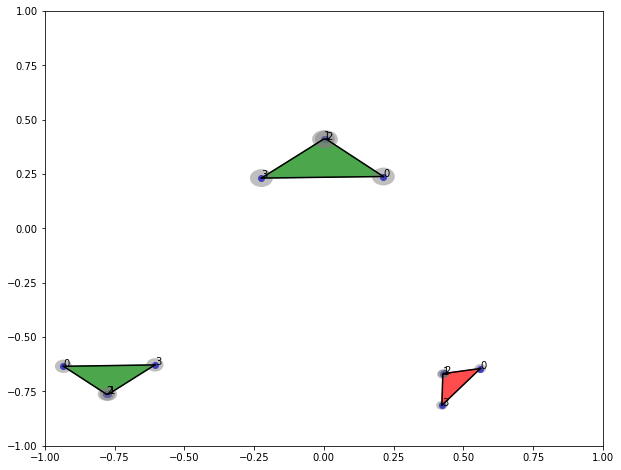

In [7]:
# parameters
n_objectives = 4
n_variables = 2 
n_local_pareto_regions = 2 
n_disconnected_regions = 0 
n_global_pareto_regions = 1 
const_space = 0.0
pareto_set_type = 0 
constraint_type = 4 

problem = DBMOPP(
    n_objectives,
    n_variables,
    n_local_pareto_regions,
    n_disconnected_regions,
    n_global_pareto_regions,
    const_space,
    pareto_set_type,
    constraint_type, 0, False, False, 0, 10000
)
print(problem._print_params())

print("Initializing works!")

# Plot the generated problem
problem.plot_problem_instance()

### Plot Pareto set members

The bigger the resolution the more defined plot we get, and need more time to compute.

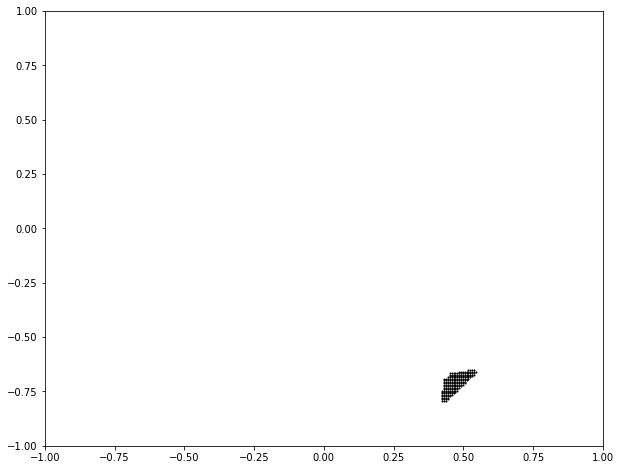

In [8]:
resolution = 300
problem.plot_pareto_set_members(resolution)

### Plot problem landscape in for single objective

One can plot the problem landscape for each of the objectives one by one.

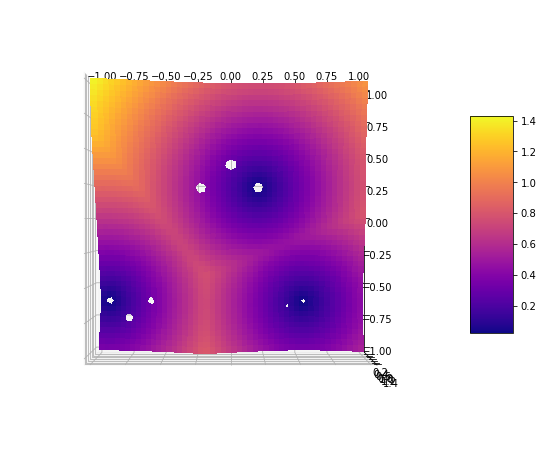

In [9]:
obj = 0 # just pick first objective as an example
resolution = 300
problem.plot_landscape_for_single_objective(obj, resolution)

### Generate DESDEO's MOProblem

In [10]:
moproblem = problem.generate_problem()

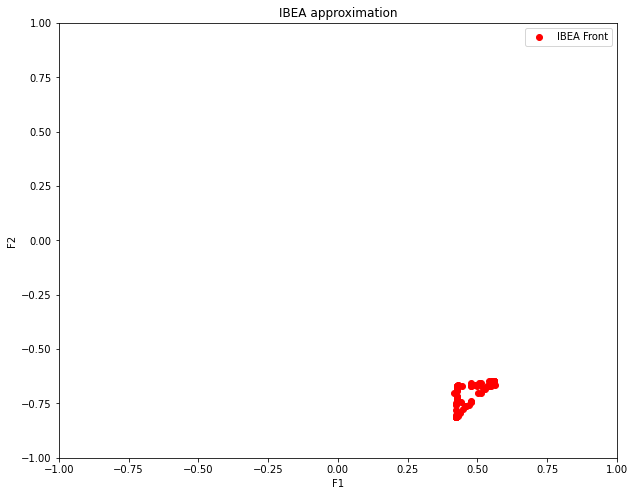

In [11]:
from desdeo_emo.EAs.IBEA import IBEA
ib = IBEA(moproblem, population_size=50, n_iterations=1, n_gen_per_iter=100,total_function_evaluations=7000)
while ib.continue_evolution():
    ib.iterate()
individuals, objective_values = ib.end()

#print(problem.evaluate(ib.population.problem.ideal))

# TODO: plot ndim individuals to 2d plot so can see top eachother ..
# plotting in objective space, they go on top of each other which is really nice!
#plt.scatter(x=objective_values[:,0], y=objective_values[:,1], c='g',label="IBEA objectives")
test_objectives = moproblem.evaluate(individuals)
#print("\nFormed MOProblem: \n\n", test_objectives) 
#print(individuals[:5])
plt.scatter(x=individuals[:,0], y=individuals[:,1], c="r", label="IBEA Front")
#plt.scatter(x=test_objectives[:,0], y=test_objectives[:,1], label="front from moproblem")
plt.title(f"IBEA approximation")
plt.xlabel("F1")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.ylabel("F2")
plt.legend()
plt.show()